# Merge csv files on Country key (clean_slavery_index, gdp_per_capita, access_to_education)

Load final csv file to df and clean columns/rows/datatypes (check just in case)
#final_df.to_csv(r'C:\Users\user\data_analysis_project\visualizing_real_world_data\Data\final_dataset.csv')

Do the correlations for victims_in_1000 based on: gdp_per_capita, access_to_education, violence_index, HDI_rank

1. Do the scatter plots; => 2. Run correlations; => 3. Run the 4 Regressions; => 4. Run OLS1; => 5. Observe low R squared value

# Reduce the sample to the first approx. 30% of the countries by slavery_index

1. Do the scatter plots - part 2; => 2. Run correlations - part 2; 3. Run the 4 Regressions - part 2; 4. Run OLS - part 2 

=> !!5. Hope to GOD R squared si closer to 1 :D!!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib as plt

# 1. Load Access to education Dataset

In [2]:
education = pd.read_csv("..//data/access_to_education_index.csv",sep=';')

In [3]:
education.columns


Index(['HDI Rank', 'Country', '1980', '1985', '1990', '1995', '2000', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

## 1.1 New Data Frame with selected columns

In [4]:
education_newdf = education[["Country","2013", "HDI Rank"]].copy()
education_newdf.rename(columns={"Country": "country", "2013": "education_access_score", "HDI Rank" : "hdi_rank"}, inplace=True)
education_newdf = education_newdf.replace("..", np.nan)
education_newdf.dropna(inplace=True)
education_newdf["education_access_score"] = education_newdf["education_access_score"].astype("str")
education_newdf["education_access_score"] = education_newdf["education_access_score"].str.replace("," , ".")
education_newdf = education_newdf.astype({"education_access_score" :float})
print(education_newdf, education_newdf.dtypes)

                                country  education_access_score  hdi_rank
0                           Afghanistan                0.365333     169.0
1                               Albania                0.608519      95.0
2                               Algeria                0.642589      93.0
3                               Andorra                0.670287      37.0
4                                Angola                0.474212     149.0
..                                  ...                     ...       ...
190  Venezuela (Bolivarian Republic of)                0.682483      67.0
191                             Vietnam                0.513489     121.0
192                               Yemen                0.339222     154.0
193                              Zambia                0.591333     141.0
194                            Zimbabwe                0.499933     156.0

[187 rows x 3 columns] country                    object
education_access_score    float64
hdi_rank            

# 2. Load Slavery Index Dataset

In [5]:
slavery_index = pd.read_csv("..//Data/clean_slavery_index.csv", header=1)

slavery_index.head()

,Country,"Population \n(from United Nations Population Division, World Population Prospects)",Region,"Est. prevalence of population in modern slavery (victims per 1,000 population)",Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,NEG Government complicity (1.4.3),NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating
0,"Korea, Democratic People's Republic of","25,244,000",Asia and the Pacific,104.6,"2,640,000",87.6,52.0,30.3,32.4,12.3,...,-1.0,-1.0,0.3,4.8,0.0,0.0,0.4,-2.0,-5.6,D
1,Eritrea,"4,847,000",Africa,93.0,"451,000",71.0,50.6,33.7,48.1,25.9,...,-1.0,-1.0,1.5,21.4,0.0,0.0,1.4,-2.0,-2.0,D
2,Burundi,"10,199,000",Africa,40.0,"408,000",72.4,42.6,42.1,48.1,41.7,...,-1.0,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C
3,Central African Republic,"4,546,000",Africa,22.3,"101,000",85.4,50.2,62.7,58.0,81.6,...,-1.0,0.0,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D
4,Afghanistan,"33,736,000",Asia and the Pacific,22.2,"749,000",81.0,41.3,64.7,46.0,92.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.1 Remove white space at the end of string

In [6]:
slavery_index.columns = slavery_index.columns.str.strip()
slavery_index.columns

Index(['Country',
       'Population \n(from United Nations Population Division, World Population Prospects)',
       'Region',
       'Est. prevalence of population in modern slavery (victims per 1,000 population)',
       'Est. number of people in modern slavery',
       'Factor One Governance Issues', 'Factor Two Nourishment and Access',
       'Factor Three Inequality', 'Factor Four Disenfranchised Groups',
       'Factor Five Effects of Conflict',
       'Final overall (normalised, weighted) vulnerability score',
       'Support survivors', '%', 'Criminal justice', '%.1', 'Coordination',
       '%.2', 'NEG Government  complicity (1.4.3)',
       'NEG State-imposed forced labour (1.8.1)', 'Address risk', '%.3',
       'Supply chains', '%.4', 'SUM/104', 'SUM Neg', 'TOTAL', 'Credit rating'],
      dtype='object')

## 2.2 Rename columns

In [7]:
slavery_index.rename(columns={"Est. prevalence of population in modern slavery (victims per 1,000 population)": "victims_per_1000_population"}, inplace=True)
slavery_index = slavery_index.rename({"Country" : "country"},axis=1)

slavery_index.rename(columns={"Population \n(from United Nations Population Division, World Population Prospects)": "total_population"}, inplace=True)

slavery_index.rename(columns={"Factor Five Effects of Conflict": "factor_five_effects_of_conflict"}, inplace=True)

slavery_index.rename(columns={"Criminal justice": "criminal_justice"}, inplace=True)

slavery_index.rename(columns={"Factor One Governance Issues":"factor_one_governance_issues"}, inplace=True)

slavery_index.rename(columns={"Factor Three Inequality":"factor_three_inequality"}, inplace=True)

## 2.3 Change datatype in total_populatin and 'Est. number of people in modern slavery' from object to string and then to a float

In [8]:
slavery_index["total_population"] = slavery_index["total_population"].astype('str') 
slavery_index["total_population"] = slavery_index["total_population"].str.replace(',','')
slavery_index = slavery_index.astype({"total_population" :float})

In [9]:
slavery_index["Est. number of people in modern slavery"] = slavery_index["Est. number of people in modern slavery"].astype('str')
slavery_index["Est. number of people in modern slavery"] = slavery_index["Est. number of people in modern slavery"].str.replace(",","")
slavery_index["Est. number of people in modern slavery"] = slavery_index["Est. number of people in modern slavery"].str.replace("<","")
slavery_index = slavery_index.astype({"Est. number of people in modern slavery" :float})
slavery_index.columns

Index(['country', 'total_population', 'Region', 'victims_per_1000_population',
       'Est. number of people in modern slavery',
       'factor_one_governance_issues', 'Factor Two Nourishment and Access',
       'factor_three_inequality', 'Factor Four Disenfranchised Groups',
       'factor_five_effects_of_conflict',
       'Final overall (normalised, weighted) vulnerability score',
       'Support survivors', '%', 'criminal_justice', '%.1', 'Coordination',
       '%.2', 'NEG Government  complicity (1.4.3)',
       'NEG State-imposed forced labour (1.8.1)', 'Address risk', '%.3',
       'Supply chains', '%.4', 'SUM/104', 'SUM Neg', 'TOTAL', 'Credit rating'],
      dtype='object')

# 3. Load GDP per Capita Dataset

In [10]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")
gdp_df.head()

,Unnamed: 0,Country,gdp_per_capita,victims_per_1000_population,gdp_per_capita2
0,0,Burundi,311.0,40.0,96721.0
1,1,Central African Republic,456.0,22.3,207936.0
2,3,Mauritania,1616.0,21.4,2611456.0
3,4,Pakistan,1608.0,16.8,2585664.0
4,5,Cambodia,1429.0,16.8,2042041.0


## 3.1 Rename columns names

In [11]:
gdp_df = gdp_df.rename({"Country" : "country"},axis=1)
gdp_df

,Unnamed: 0,country,gdp_per_capita,victims_per_1000_population,gdp_per_capita2
0,0,Burundi,311.0,40.0,9.672100e+04
1,1,Central African Republic,456.0,22.3,2.079360e+05
2,3,Mauritania,1616.0,21.4,2.611456e+06
3,4,Pakistan,1608.0,16.8,2.585664e+06
4,5,Cambodia,1429.0,16.8,2.042041e+06
...,...,...,...,...,...
134,136,Chile,15597.0,0.8,2.432664e+08
135,137,Australia,55888.0,0.6,3.123469e+09
136,138,New Zealand,44511.0,0.6,1.981229e+09
137,139,Canada,45894.0,0.5,2.106259e+09


# 4. Merge 3 Datasets (Access to education, Slavery Index, GDP per Capita)

## 4.1 Merge `slavery_index` with `education_newdf`

In [12]:
merge_2dsets = pd.merge(slavery_index, education_newdf,on="country")

## 4.2 Final merge with `gdp_df` dataset

##### This is the final DataFrame for the regression analysis.

In [13]:
merge_3dsets = pd.merge(merge_2dsets, gdp_df, on="country")
merge_3dsets

,country,total_population,Region,victims_per_1000_population_x,Est. number of people in modern slavery,factor_one_governance_issues,Factor Two Nourishment and Access,factor_three_inequality,Factor Four Disenfranchised Groups,factor_five_effects_of_conflict,...,SUM/104,SUM Neg,TOTAL,Credit rating,education_access_score,hdi_rank,Unnamed: 0,gdp_per_capita,victims_per_1000_population_y,gdp_per_capita2
0,Burundi,10199000.0,Africa,40.0,408000.0,72.4,42.6,42.1,48.1,41.7,...,5.0,-2.0,10.7,C,0.370089,180.0,0,311.0,40.0,9.672100e+04
1,Central African Republic,4546000.0,Africa,22.3,101000.0,85.4,50.2,62.7,58.0,81.6,...,1.7,-1.0,2.5,D,0.317867,185.0,1,456.0,22.3,2.079360e+05
2,Mauritania,4182000.0,Africa,21.4,90000.0,67.3,33.7,39.3,50.5,22.3,...,5.3,-1.0,15.5,C,0.352278,161.0,3,1616.0,21.4,2.611456e+06
3,Pakistan,189381000.0,Asia and the Pacific,16.8,3186000.0,56.8,36.2,45.9,55.3,92.8,...,6.2,-1.0,18.6,C,0.371667,146.0,4,1608.0,16.8,2.585664e+06
4,Cambodia,15518000.0,Asia and the Pacific,16.8,261000.0,66.3,38.5,41.6,56.7,14.8,...,10.5,0.0,37.6,CCC,0.495178,136.0,5,1429.0,16.8,2.042041e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Chile,17763000.0,Americas,0.8,14000.0,28.5,13.8,50.0,23.5,20.3,...,17.5,0.0,62.3,BBB,0.745675,41.0,136,15597.0,0.8,2.432664e+08
134,Australia,23800000.0,Asia and the Pacific,0.6,15000.0,11.9,15.7,20.7,12.0,13.0,...,17.9,0.0,63.8,BBB,0.926536,2.0,137,55888.0,0.6,3.123469e+09
135,New Zealand,4615000.0,Asia and the Pacific,0.6,3000.0,12.2,18.4,16.2,7.0,7.0,...,16.1,0.0,57.6,BB,0.916767,7.0,138,44511.0,0.6,1.981229e+09
136,Canada,35950000.0,Americas,0.5,17000.0,16.6,20.7,20.1,9.2,21.5,...,16.4,0.0,58.6,BB,0.850300,8.0,139,45894.0,0.5,2.106259e+09


## 4.3 Drop the NaN values

In [14]:
merge_3dsets = merge_3dsets.copy()
merge_3dsets.dropna(inplace=True)



In [15]:
merge_3dsets.rename(columns={"victims_per_1000_population_x": "victims_per_1000_population"}, inplace=True)
merge_3dsets.drop(columns=["victims_per_1000_population_y", "Unnamed: 0"],inplace=True)


In [16]:
merge_3dsets

,country,total_population,Region,victims_per_1000_population,Est. number of people in modern slavery,factor_one_governance_issues,Factor Two Nourishment and Access,factor_three_inequality,Factor Four Disenfranchised Groups,factor_five_effects_of_conflict,...,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating,education_access_score,hdi_rank,gdp_per_capita,gdp_per_capita2
0,Burundi,10199000.0,Africa,40.0,408000.0,72.4,42.6,42.1,48.1,41.7,...,0.0,0.0,5.0,-2.0,10.7,C,0.370089,180.0,311.0,9.672100e+04
1,Central African Republic,4546000.0,Africa,22.3,101000.0,85.4,50.2,62.7,58.0,81.6,...,0.0,0.0,1.7,-1.0,2.5,D,0.317867,185.0,456.0,2.079360e+05
2,Mauritania,4182000.0,Africa,21.4,90000.0,67.3,33.7,39.3,50.5,22.3,...,0.0,0.0,5.3,-1.0,15.5,C,0.352278,161.0,1616.0,2.611456e+06
3,Pakistan,189381000.0,Asia and the Pacific,16.8,3186000.0,56.8,36.2,45.9,55.3,92.8,...,0.0,0.0,6.2,-1.0,18.6,C,0.371667,146.0,1608.0,2.585664e+06
4,Cambodia,15518000.0,Asia and the Pacific,16.8,261000.0,66.3,38.5,41.6,56.7,14.8,...,0.0,0.0,10.5,0.0,37.6,CCC,0.495178,136.0,1429.0,2.042041e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Chile,17763000.0,Americas,0.8,14000.0,28.5,13.8,50.0,23.5,20.3,...,0.0,0.0,17.5,0.0,62.3,BBB,0.745675,41.0,15597.0,2.432664e+08
134,Australia,23800000.0,Asia and the Pacific,0.6,15000.0,11.9,15.7,20.7,12.0,13.0,...,0.0,0.0,17.9,0.0,63.8,BBB,0.926536,2.0,55888.0,3.123469e+09
135,New Zealand,4615000.0,Asia and the Pacific,0.6,3000.0,12.2,18.4,16.2,7.0,7.0,...,0.0,0.0,16.1,0.0,57.6,BB,0.916767,7.0,44511.0,1.981229e+09
136,Canada,35950000.0,Americas,0.5,17000.0,16.6,20.7,20.1,9.2,21.5,...,0.0,0.0,16.4,0.0,58.6,BB,0.850300,8.0,45894.0,2.106259e+09


# 4.4 Export the merged table into a csv file

In [17]:
#merge_3dsets.to_csv(r"C:\Users\user\data_analysis_project\visualizing_real_world_data\Data\merged_dataset.csv")

## 4.5 Correlations

In [18]:
merge_3dsets[["victims_per_1000_population",
              "factor_one_governance_issues",
              "factor_three_inequality",
              "factor_five_effects_of_conflict",
              "gdp_per_capita",
              "education_access_score",
              "hdi_rank",
              "criminal_justice"]].corr(method='pearson')

,victims_per_1000_population,factor_one_governance_issues,factor_three_inequality,factor_five_effects_of_conflict,gdp_per_capita,education_access_score,hdi_rank,criminal_justice
victims_per_1000_population,1.000000,0.522369,0.210582,0.355543,-0.380121,-0.486700,0.510094,-0.418467
factor_one_governance_issues,0.522369,1.000000,0.471129,0.418644,-0.689256,-0.720322,0.736616,-0.632332
factor_three_inequality,0.210582,0.471129,1.000000,0.269874,-0.606970,-0.486627,0.541685,-0.251043
factor_five_effects_of_conflict,0.355543,0.418644,0.269874,1.000000,-0.363931,-0.413569,0.395833,-0.167321
gdp_per_capita,-0.380121,-0.689256,-0.606970,-0.363931,1.000000,0.639031,-0.747347,0.308439
education_access_score,-0.486700,-0.720322,-0.486627,-0.413569,0.639031,1.000000,-0.945600,0.527980
hdi_rank,0.510094,0.736616,0.541685,0.395833,-0.747347,-0.945600,1.000000,-0.491626
criminal_justice,-0.418467,-0.632332,-0.251043,-0.167321,0.308439,0.527980,-0.491626,1.000000


## 4.6 Define a Regression Function

In [19]:
def run_regression(df, y_col, X_cols):
    y = df[y_col]
    X = df[X_cols]
    X = sm.add_constant(X)
    
    l = sm.OLS(y, X)
    return l.fit()
# Dependant Variable
y_col= "victims_per_1000_population"

# Multiple regression function
run_regression(merge_3dsets, y_col, ["factor_five_effects_of_conflict",
                                     "education_access_score",
                                     "criminal_justice"]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     victims_per_1000_population   R-squared:                       0.306
Model:                                     OLS   Adj. R-squared:                  0.291
Method:                          Least Squares   F-statistic:                     19.72
Date:                         Sun, 12 Jul 2020   Prob (F-statistic):           1.19e-10
Time:                                 13:20:46   Log-Likelihood:                -387.10
No. Observations:                          138   AIC:                             782.2
Df Residuals:                              134   BIC:                             793.9
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              11.2124      1.678      6.683      0.000       7.894      14.531
factor_five_effects_of_conflict     0.0500      0.020      2.535      0.012       0.011       0.089
education_access_score             -7.5084      2.484     -3.023      0.003     -12.421      -2.596
criminal_justice                   -1.0347      0.369     -2.805      0.006      -1.764      -0.305
==============================================================================
Omnibus:                      143.867   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3275.418
Skew:                           3.668   Prob(JB):                         0.00
Kurtosis:                      25.712   Cond. No.                         272.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot 1
## Victims /1000 population - Factor Five Effects of Conflict

[Text(0, 0.5, 'Victims per 1.000 Population'),
 Text(0.5, 0, 'Effects of Conflict'),
 Text(0.5, 1.0, 'Effects of Conflict vs Victims')]

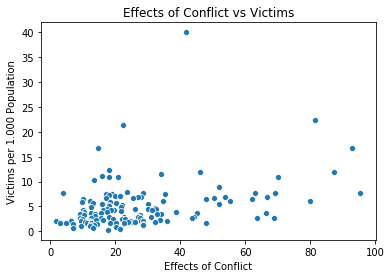

In [20]:
ax = sns.scatterplot(data=merge_3dsets,
                x="factor_five_effects_of_conflict",
                y="victims_per_1000_population");
ax.set(xlabel="Effects of Conflict", ylabel="Victims per 1.000 Population", title="Effects of Conflict vs Victims")



[Text(0, 0.5, 'Victims per 1.000 Population'),
 Text(0.5, 0, 'Effects of Conflict'),
 Text(0.5, 1.0, 'Effects of Conflict vs Victims')]

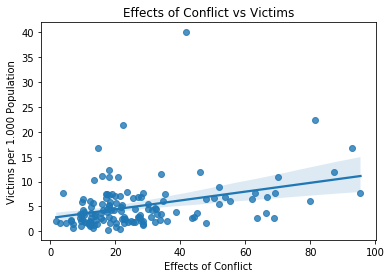

In [21]:
ax= sns.regplot(data=merge_3dsets,
                x="factor_five_effects_of_conflict",
                y="victims_per_1000_population");

ax.set(xlabel= "Effects of Conflict", 
       ylabel= "Victims per 1.000 Population", 
       title= "Effects of Conflict vs Victims")


# Plot 2
## Victims /1000 population - Education Access Score


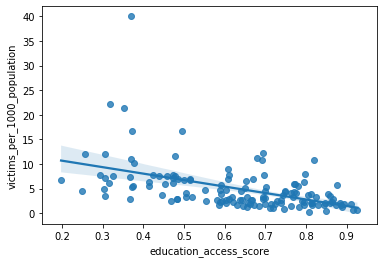

In [22]:
ax= sns.regplot(data=merge_3dsets,
                x="education_access_score",
                y="victims_per_1000_population");

# Plot 3
## Victims /1000 population - Criminal justice

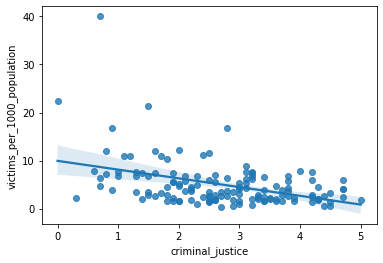

In [23]:
ax= sns.regplot(data=merge_3dsets,
                x="criminal_justice",
                y="victims_per_1000_population");


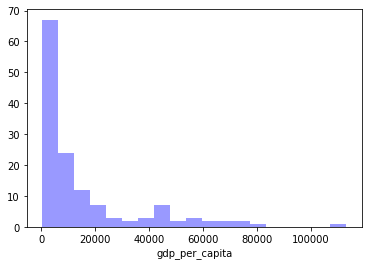

In [24]:
plot3 = sns.distplot(merge_3dsets["gdp_per_capita"],
                    kde=False,
                    color="b")

# Plot 4
## GDP per Capita - Victims /1000 population

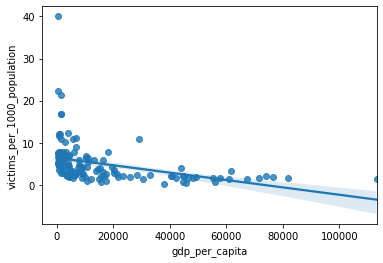

In [25]:
ax= sns.regplot(data=merge_3dsets,
                x="gdp_per_capita",
                y="victims_per_1000_population");

# Distribution plot for victims per 1.000 population

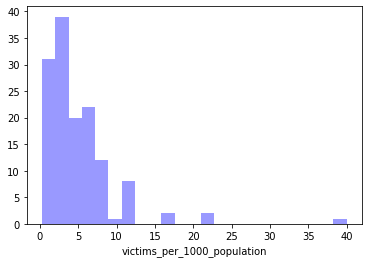

In [38]:
plot = sns.distplot(merge_3dsets["victims_per_1000_population"],
                    kde=False,
                    color="b")

# 5. Reduce the sample to the first approx. 30% of the countries by slavery_index

## 5.1 Sort descending

In [27]:
merge_3dsets.sort_values(by=["victims_per_1000_population"], ascending=False)
merge_3dsets.head(30)

,country,total_population,Region,victims_per_1000_population,Est. number of people in modern slavery,factor_one_governance_issues,Factor Two Nourishment and Access,factor_three_inequality,Factor Four Disenfranchised Groups,factor_five_effects_of_conflict,...,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating,education_access_score,hdi_rank,gdp_per_capita,gdp_per_capita2
0,Burundi,10199000.0,Africa,40.0,408000.0,72.4,42.6,42.1,48.1,41.7,...,0.0,0.0,5.0,-2.0,10.7,C,0.370089,180.0,311.0,96721.0
1,Central African Republic,4546000.0,Africa,22.3,101000.0,85.4,50.2,62.7,58.0,81.6,...,0.0,0.0,1.7,-1.0,2.5,D,0.317867,185.0,456.0,207936.0
2,Mauritania,4182000.0,Africa,21.4,90000.0,67.3,33.7,39.3,50.5,22.3,...,0.0,0.0,5.3,-1.0,15.5,C,0.352278,161.0,1616.0,2611456.0
3,Pakistan,189381000.0,Asia and the Pacific,16.8,3186000.0,56.8,36.2,45.9,55.3,92.8,...,0.0,0.0,6.2,-1.0,18.6,C,0.371667,146.0,1608.0,2585664.0
4,Cambodia,15518000.0,Asia and the Pacific,16.8,261000.0,66.3,38.5,41.6,56.7,14.8,...,0.0,0.0,10.5,0.0,37.6,CCC,0.495178,136.0,1429.0,2042041.0
5,Mongolia,2977000.0,Asia and the Pacific,12.3,37000.0,40.9,36.8,35.1,47.1,18.1,...,0.0,0.0,9.6,-1.0,30.7,CCC,0.693667,103.0,3838.0,14730244.0
6,Sudan,38648000.0,Africa,12.0,465000.0,80.7,46.6,42.4,37.0,87.4,...,0.0,0.0,5.2,-1.0,14.9,C,0.305956,166.0,1174.0,1378276.0
7,Chad,14009000.0,Africa,12.0,168000.0,71.8,43.2,48.5,46.5,46.1,...,0.0,0.0,5.7,-1.0,16.7,C,0.255852,184.0,714.0,509796.0
8,Rwanda,11630000.0,Africa,11.6,134000.0,56.6,40.8,40.0,55.7,34.0,...,0.0,0.0,11.4,-2.0,33.6,CCC,0.478167,151.0,796.0,633616.0
9,Turkmenistan,5565000.0,Europe and Central Asia,11.2,62000.0,80.2,21.5,31.4,32.6,15.9,...,0.0,0.0,9.6,-2.0,27.1,CC,0.678713,103.0,6815.0,46444225.0


## 5.2 Top 30 countries 

In [28]:
df30pcent = merge_3dsets.iloc[0:30]


In [29]:
df30pcent

,country,total_population,Region,victims_per_1000_population,Est. number of people in modern slavery,factor_one_governance_issues,Factor Two Nourishment and Access,factor_three_inequality,Factor Four Disenfranchised Groups,factor_five_effects_of_conflict,...,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating,education_access_score,hdi_rank,gdp_per_capita,gdp_per_capita2
0,Burundi,10199000.0,Africa,40.0,408000.0,72.4,42.6,42.1,48.1,41.7,...,0.0,0.0,5.0,-2.0,10.7,C,0.370089,180.0,311.0,96721.0
1,Central African Republic,4546000.0,Africa,22.3,101000.0,85.4,50.2,62.7,58.0,81.6,...,0.0,0.0,1.7,-1.0,2.5,D,0.317867,185.0,456.0,207936.0
2,Mauritania,4182000.0,Africa,21.4,90000.0,67.3,33.7,39.3,50.5,22.3,...,0.0,0.0,5.3,-1.0,15.5,C,0.352278,161.0,1616.0,2611456.0
3,Pakistan,189381000.0,Asia and the Pacific,16.8,3186000.0,56.8,36.2,45.9,55.3,92.8,...,0.0,0.0,6.2,-1.0,18.6,C,0.371667,146.0,1608.0,2585664.0
4,Cambodia,15518000.0,Asia and the Pacific,16.8,261000.0,66.3,38.5,41.6,56.7,14.8,...,0.0,0.0,10.5,0.0,37.6,CCC,0.495178,136.0,1429.0,2042041.0
5,Mongolia,2977000.0,Asia and the Pacific,12.3,37000.0,40.9,36.8,35.1,47.1,18.1,...,0.0,0.0,9.6,-1.0,30.7,CCC,0.693667,103.0,3838.0,14730244.0
6,Sudan,38648000.0,Africa,12.0,465000.0,80.7,46.6,42.4,37.0,87.4,...,0.0,0.0,5.2,-1.0,14.9,C,0.305956,166.0,1174.0,1378276.0
7,Chad,14009000.0,Africa,12.0,168000.0,71.8,43.2,48.5,46.5,46.1,...,0.0,0.0,5.7,-1.0,16.7,C,0.255852,184.0,714.0,509796.0
8,Rwanda,11630000.0,Africa,11.6,134000.0,56.6,40.8,40.0,55.7,34.0,...,0.0,0.0,11.4,-2.0,33.6,CCC,0.478167,151.0,796.0,633616.0
9,Turkmenistan,5565000.0,Europe and Central Asia,11.2,62000.0,80.2,21.5,31.4,32.6,15.9,...,0.0,0.0,9.6,-2.0,27.1,CC,0.678713,103.0,6815.0,46444225.0


In [30]:
df30pcent[["victims_per_1000_population",
              "factor_one_governance_issues",
              "factor_three_inequality",
              "factor_five_effects_of_conflict",
              "gdp_per_capita",
              "education_access_score",
              "hdi_rank",
              "criminal_justice"]].corr(method='pearson')

,victims_per_1000_population,factor_one_governance_issues,factor_three_inequality,factor_five_effects_of_conflict,gdp_per_capita,education_access_score,hdi_rank,criminal_justice
victims_per_1000_population,1.000000,0.357493,0.066832,0.148977,-0.162584,-0.242945,0.247284,-0.407570
factor_one_governance_issues,0.357493,1.000000,0.306441,0.164645,-0.343995,-0.445019,0.400408,-0.556322
factor_three_inequality,0.066832,0.306441,1.000000,0.345505,-0.380375,-0.484318,0.490161,-0.218634
factor_five_effects_of_conflict,0.148977,0.164645,0.345505,1.000000,-0.204445,-0.220080,0.152207,-0.059770
gdp_per_capita,-0.162584,-0.343995,-0.380375,-0.204445,1.000000,0.639556,-0.807511,0.188872
education_access_score,-0.242945,-0.445019,-0.484318,-0.220080,0.639556,1.000000,-0.922895,0.455061
hdi_rank,0.247284,0.400408,0.490161,0.152207,-0.807511,-0.922895,1.000000,-0.354971
criminal_justice,-0.407570,-0.556322,-0.218634,-0.059770,0.188872,0.455061,-0.354971,1.000000


## 5.3 OLS Regression

In [44]:
y_col= "victims_per_1000_population"

# Multiple regression function
run_regression(df30pcent, y_col, ["factor_five_effects_of_conflict",
                                  "gdp_per_capita",
                                  "education_access_score",
                                  "criminal_justice"]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     victims_per_1000_population   R-squared:                       0.186
Model:                                     OLS   Adj. R-squared:                  0.055
Method:                          Least Squares   F-statistic:                     1.426
Date:                         Sun, 12 Jul 2020   Prob (F-statistic):              0.255
Time:                                 13:26:07   Log-Likelihood:                -96.445
No. Observations:                           30   AIC:                             202.9
Df Residuals:                               25   BIC:                             209.9
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              15.3701      5.053      3.042      0.005       4.963      25.777
factor_five_effects_of_conflict     0.0282      0.047      0.605      0.551      -0.068       0.124
gdp_per_capita                  -7.579e-05      0.000     -0.283      0.780      -0.001       0.000
education_access_score              0.0790     11.210      0.007      0.994     -23.009      23.167
criminal_justice                   -2.4856      1.310     -1.897      0.069      -5.185       0.213
==============================================================================
Omnibus:                       35.414   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.628
Skew:                           2.447   Prob(JB):                     3.14e-23
Kurtosis:                      10.678   Cond. No.                     7.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

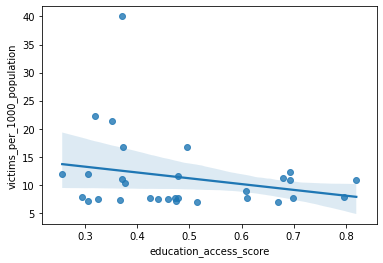

In [32]:
ax= sns.regplot(data=df30pcent,
                x="education_access_score",
                y="victims_per_1000_population");

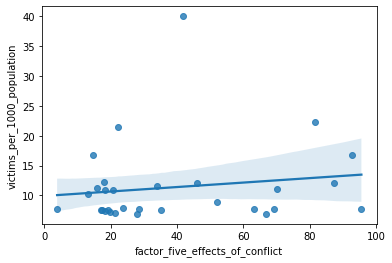

In [33]:
ax= sns.regplot(data=df30pcent,
                x="factor_five_effects_of_conflict",
                y="victims_per_1000_population");

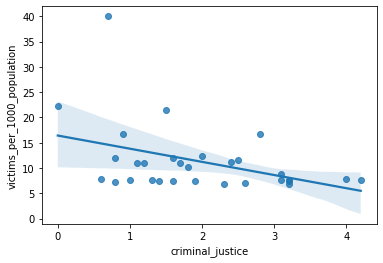

In [34]:
ax= sns.regplot(data=df30pcent,
                x="criminal_justice",
                y="victims_per_1000_population");

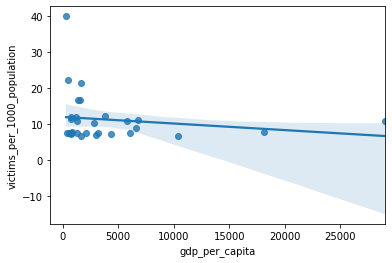

In [35]:
ax= sns.regplot(data=df30pcent,
                x="gdp_per_capita",
                y="victims_per_1000_population");

In [36]:
df30pcent.columns

Index(['country', 'total_population', 'Region', 'victims_per_1000_population',
       'Est. number of people in modern slavery',
       'factor_one_governance_issues', 'Factor Two Nourishment and Access',
       'factor_three_inequality', 'Factor Four Disenfranchised Groups',
       'factor_five_effects_of_conflict',
       'Final overall (normalised, weighted) vulnerability score',
       'Support survivors', '%', 'criminal_justice', '%.1', 'Coordination',
       '%.2', 'NEG Government  complicity (1.4.3)',
       'NEG State-imposed forced labour (1.8.1)', 'Address risk', '%.3',
       'Supply chains', '%.4', 'SUM/104', 'SUM Neg', 'TOTAL', 'Credit rating',
       'education_access_score', 'hdi_rank', 'gdp_per_capita',
       'gdp_per_capita2'],
      dtype='object')

In [50]:
run_regression(df30pcent, y_col, ["education_access_score",
                                  "criminal_justice",
                                  "factor_five_effects_of_conflict"]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     victims_per_1000_population   R-squared:                       0.183
Model:                                     OLS   Adj. R-squared:                  0.089
Method:                          Least Squares   F-statistic:                     1.943
Date:                         Sun, 12 Jul 2020   Prob (F-statistic):              0.147
Time:                                 13:38:55   Log-Likelihood:                -96.493
No. Observations:                           30   AIC:                             201.0
Df Residuals:                               26   BIC:                             206.6
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              15.8708      4.648      3.415      0.002       6.317      25.425
education_access_score             -1.8759      8.666     -0.216      0.830     -19.689      15.937
criminal_justice                   -2.4315      1.273     -1.910      0.067      -5.049       0.186
factor_five_effects_of_conflict     0.0293      0.046      0.641      0.527      -0.065       0.123
==============================================================================
Omnibus:                       35.912   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.771
Skew:                           2.482   Prob(JB):                     6.53e-24
Kurtosis:                      10.796   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""